# **ENVIRONMENT SETUP**

# **Install Packages**

In [3]:
# pip install autocorrect
# pip install spacy==3.0.5
# !python -m spacy download en_core_web_sm
# pip install spacytextblob
# !pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.0 MB/s eta 0:00:00


<div class = "alert alert-success" style='color:black'> 🌟 SpaCy Version 3.0! </div>

# **Import Packages**

In [4]:
import warnings
import numpy as np 
import pandas as pd 
import os
import re
import nltk
from nltk.corpus import abc
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.snowball import *
from nltk.util import ngrams
import string
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
from autocorrect import Speller
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
import gensim
from gensim.models.word2vec import Text8Corpus
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Queen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# **DATA PREPROCESSING**

# **Data Loading**

In [5]:
data = pd.read_csv('train.csv')
print('Total number of entries in the train dataset are:', len(data))
data.head()

Total number of entries in the train dataset are: 7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# **Preliminary Analysis**

In [6]:
data.shape

(7613, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
data.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [9]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
data.isna()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [11]:
data = data[['id', 'text']]
data

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...
...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...
7609,10870,@aria_ahrary @TheTawniest The out of control w...
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,10872,Police investigating after an e-bike collided ...


In [12]:
text = data['text']
text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

# **Sentence Tokenization**

For any corpus, we first divide a huge entity into smaller entities so that they can be treated individually. Tokenization also does a similar task but upon sentences in text. First, the text is broken down into sentences and that is further broken down into words. The input is given as text or a corpus. The output generates a list of sentences. For example, in the text, "I love dogs. I have a dog", the output is ["I love dogs,” I have a dog”]

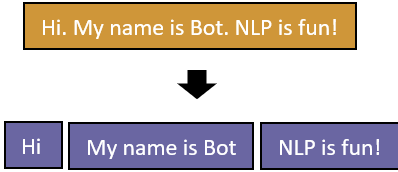

In [15]:
sents1 = sent_tokenize(text[1000])
print(f'Sentence Tokenization using NLTK: \n {text[1000]} => {sents1}')

Sentence Tokenization using NLTK: 
 #OVOFest Drake straight body bagging Meek on that OVO stage. #ZIPHIMUP! => ['#OVOFest Drake straight body bagging Meek on that OVO stage.', '#ZIPHIMUP!']


# **Word Tokenization**

Word tokenization is the same as sentence tokenization. But, rather than applying it to
sentences, it is used on words so that individual words are separated as items in a
list. For example, in the sentence, "Chennai is humid,” the result is ["Chennai,” “is,”
“humid”].

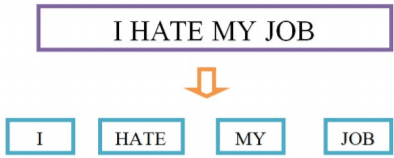

In [16]:
words1 = word_tokenize(sents1[0])
print(f'Word Tokenization using NLTK: \n {sents1[0]} => {words1}')

Word Tokenization using NLTK: 
 #OVOFest Drake straight body bagging Meek on that OVO stage. => ['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.']


In [17]:
sp = spacy.load('en_core_web_sm')

In [18]:
print(f'Word Tokenization using SpaCy: \n\n{sp(text[0])} =>\n')

words2 = sp(text[0])
for word in words2:
    print(word)

Word Tokenization using SpaCy: 

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all =>

Our
Deeds
are
the
Reason
of
this
#
earthquake
May
ALLAH
Forgive
us
all


# **Stopword Removal**

The dataset may contain words like ‘after,’ ‘every’ and ‘I.’ These words are not relevant to important NLP applications like the sentiment detection process. Thereby, these words can be deleted to minimize the burden on the system.

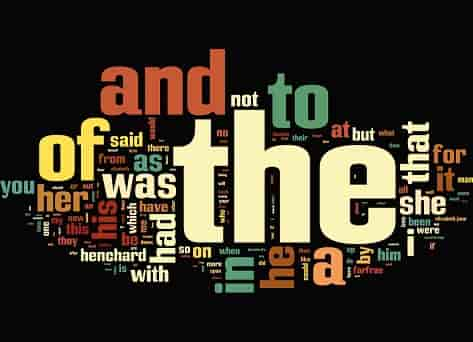

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Queen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [20]:
tokens1 = [word for word in words1 if not word in stopwords.words('english')] 
print(f'Stopword Removal using NLTK: \n{words1} => {tokens1}')

Stopword Removal using NLTK: 
['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.'] => ['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'OVO', 'stage', '.']


In [21]:
spacy_stopwords = sp.Defaults.stop_words
print(f'SpaCy Stopwords: \n{spacy_stopwords}')

SpaCy Stopwords: 
{'most', 'still', 'fifty', 'me', 'thru', 'per', 'anyone', 'whom', 'get', 'hereupon', 'should', 'whereby', 'none', 'without', '’ve', 'well', '‘ve', 'various', 'several', 'hence', 'across', 'to', 'make', 'your', 'nor', 'even', 'so', 'why', 'within', 'using', 'amongst', 'sometimes', 'others', 'itself', 'last', 'sixty', 'amount', 'and', '‘ll', '‘d', 'doing', 'hers', 'ever', 'thereupon', 'name', 'side', 'with', '‘re', 'whereas', 'quite', 'everywhere', 'while', 'empty', 'is', 'via', 'call', 'under', 'around', 'an', 'thus', 'themselves', 'very', 'made', 'both', 'these', 'among', 'forty', 'top', "'re", 'cannot', 'him', 'whether', 'beside', 'hereby', 'n‘t', 'latterly', 'sometime', 'behind', 'elsewhere', 'along', 'hundred', "'s", 'by', 'are', 'five', '’re', 'whenever', 'anyhow', 'really', 'or', 'being', 'been', 'again', 'herein', 'show', 'next', 'moreover', 'who', 'unless', 'down', 'much', 'seems', 'the', 'such', 'any', 'therein', 'thereafter', 'has', 'some', 'each', 'too', 'th

In [22]:
tokens2 = [word for word in words2 if word not in spacy_stopwords] 
print(f'Stopword Removal using SpaCy: \n{words2} => {tokens2}')

Stopword Removal using SpaCy: 
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all => [Our, Deeds, are, the, Reason, of, this, #, earthquake, May, ALLAH, Forgive, us, all]


In [23]:
from string import punctuation
print(f'Delimiters in English: \n{punctuation}')

Delimiters in English: 
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
tokens1 = [word for word in words1 if word not in punctuation]
print(f'Delimiter Removal: \n{words1} => {tokens1}')

Delimiter Removal: 
['#', 'OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage', '.'] => ['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage']


# **Removal of Tags**

During web scraping, the data is scraped from web pages residing on the website, and they contain HTML tags. These tags do not provide any necessary information and hence, can be erased. For example, a tag like < body > (Body Tag) is deleted.

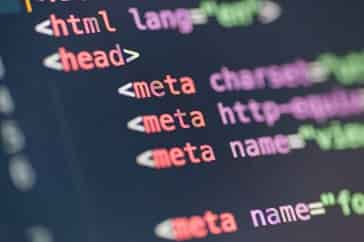

In [25]:
sent_with_html = "<head> <title> Natural Language Processing </title> </head>"
remove_html = re.compile('<.*?>')

print(f"Removing HTML tags: \n{sent_with_html} => {re.sub(remove_html, '', sent_with_html).strip()}")

Removing HTML tags: 
<head> <title> Natural Language Processing </title> </head> => Natural Language Processing


In [26]:
spell = Speller()

print('Spelling Correction:\n')
for token in tokens1:
    print(f'{token} => {spell(token)}')


Spelling Correction:

OVOFest => OVOFest
Drake => Drake
straight => straight
body => body
bagging => bagging
Meek => Meek
on => on
that => that
OVO => VO
stage => stage


In [27]:
spell = Speller()
misspelled = ['Calandar', 'neccessary', 'recieve', 'adress', 'misteak']

print('Tokens before and after Spelling Correction (Own Example):\n')
for token in misspelled:
    print(f'{token} : {spell(token)}')


Tokens before and after Spelling Correction (Own Example):

Calandar : Calendar
neccessary : necessary
recieve : receive
adress : address
misteak : mistake


In [28]:
porterStemmer = PorterStemmer()
stemWords1 = [porterStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Porter Stemmer: \n{stemWords1}')

Tokens after Stemming using Porter Stemmer: 
['ovofest', 'drake', 'straight', 'bodi', 'bag', 'meek', 'on', 'that', 'ovo', 'stage']


In [29]:
snowballStemmer = SnowballStemmer('english')
stemWords2 = [snowballStemmer.stem(word) for word in tokens1]

print(f'Tokens after Stemming using Snowball Stemmer: \n{stemWords2}')

Tokens after Stemming using Snowball Stemmer: 
['ovofest', 'drake', 'straight', 'bodi', 'bag', 'meek', 'on', 'that', 'ovo', 'stage']


In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Queen\AppData\Roaming\nltk_data...


True

In [32]:
wordNetLemmatizer = WordNetLemmatizer()
lemmaWords1 = [wordNetLemmatizer.lemmatize(word) for word in tokens1]

print(f'Tokens after Lemmatization using WordNet Lemmatizer: \n{tokens1} => {lemmaWords1}')

Tokens after Lemmatization using WordNet Lemmatizer: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => ['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage']


In [33]:
lemmaWords2 = [word.lemma_ for word in tokens2]

print(f'Tokens after Lemmatization using SpaCy Lemmatization: \n{tokens2} => {lemmaWords2}')

Tokens after Lemmatization using SpaCy Lemmatization: 
[Our, Deeds, are, the, Reason, of, this, #, earthquake, May, ALLAH, Forgive, us, all] => ['our', 'deed', 'be', 'the', 'reason', 'of', 'this', '#', 'earthquake', 'may', 'ALLAH', 'forgive', 'we', 'all']


# **FEATURE ENGINEERING**

# **Encoding**

Encoding is the process of encrypting data in a format that computers can understand. Humans comprehend natural language. However, a machine is capable of decoding only 0s and 1s. Encoding converts text to digits. For example, the words 'positive' and 'negative' are mapped to the numbers '0' and '1'.

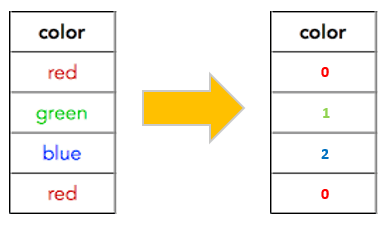

In [34]:
animals = ['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog']

label_encoder = preprocessing.LabelEncoder()
data = pd.DataFrame({'Labels' : animals, 'Label Encoder Values' : label_encoder.fit_transform(animals)})

print("Label Encoder")
data.style.background_gradient(cmap = 'BrBG')

Label Encoder


,Labels,Label Encoder Values
0,dog,1
1,cat,0
2,mouse,3
3,dog,1
4,lion,2
5,lion,2
6,mouse,3
7,tiger,5
8,rat,4
9,dog,1


In [35]:
animals = np.array(['dog', 'cat', 'mouse', 'dog', 'lion', 'lion', 'mouse', 'tiger', 'rat', 'dog'])

ohe = preprocessing.OneHotEncoder()
result = ohe.fit_transform(animals.reshape(-1,1)).toarray()

data = pd.DataFrame(result.astype(int))
data['Labels'] = animals

print("One Hot Encoder")
data.style.background_gradient(cmap = 'Wistia')

One Hot Encoder


,0,1,2,3,4,5,Labels
0,0,1,0,0,0,0,dog
1,1,0,0,0,0,0,cat
2,0,0,0,1,0,0,mouse
3,0,1,0,0,0,0,dog
4,0,0,1,0,0,0,lion
5,0,0,1,0,0,0,lion
6,0,0,0,1,0,0,mouse
7,0,0,0,0,0,1,tiger
8,0,0,0,0,1,0,rat
9,0,1,0,0,0,0,dog


# **POS Tagger**

POS tagger is parts of speech tagger that is an in-built function found in a standard library. It tags the words in the sentences according to the grammar of the langauge. For example, in the text, “The pizza was disgusting but the location was beautiful”, the result after implementing POS tagger will be [“The [DT]”, “pizza [NN]”, “is [VB]”, “disgusting [VBG]”, “but [CC]”, “the [DT]”, “location [NN]”, “was [VBD], “beautiful [JJ]].

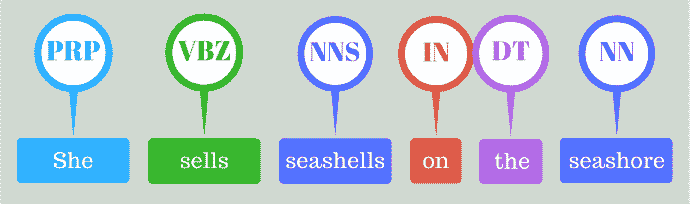

In [37]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Queen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [38]:
tagged_tokens1 = nltk.pos_tag(tokens1)

print(f'POS tagging using NLTK: \n{tokens1} => {tagged_tokens1}')

POS tagging using NLTK: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => [('OVOFest', 'NNP'), ('Drake', 'NNP'), ('straight', 'VBD'), ('body', 'NN'), ('bagging', 'VBG'), ('Meek', 'NNP'), ('on', 'IN'), ('that', 'DT'), ('OVO', 'NNP'), ('stage', 'NN')]


In [39]:
tagged_tokens2 = [word.pos_ for word in tokens2]

print('POS tagging using SpaCy: \n')
for i in range(len(tagged_tokens2)):
    print(f'{tokens2[i]} : {tagged_tokens2[i]}')

POS tagging using SpaCy: 

Our : PRON
Deeds : NOUN
are : AUX
the : DET
Reason : NOUN
of : ADP
this : DET
# : ADJ
earthquake : NOUN
May : AUX
ALLAH : PROPN
Forgive : VERB
us : PRON
all : PRON


# **N-Gram**

N-gram is a language model widely used in NLP and is applied to statistical problems involving text and audio. It is a probabilistic model that predicts the next series of words. For example, in the sentence, “The movie was boring.” Unigram processes the text as [“The”, “movie”, “was”, “boring”]. Bi-gram processes the text as [“The movie”, “movie was”, “was boring”]. Tri-gram processes the text as [“The movie was”, “movie was boring”]

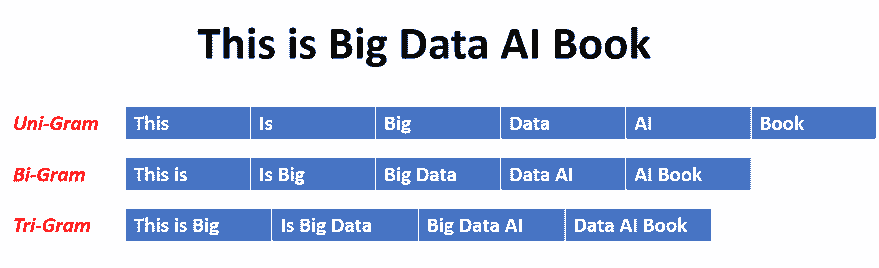

In [40]:
n_grams1 = ngrams(tokens1, 2)
n_grams1 = [ ' '.join(grams) for grams in n_grams1]

print(f'N-Gram using NLTK (n = 2): \n{tokens1} => {n_grams1}')

N-Gram using NLTK (n = 2): 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => ['OVOFest Drake', 'Drake straight', 'straight body', 'body bagging', 'bagging Meek', 'Meek on', 'on that', 'that OVO', 'OVO stage']


In [41]:
n_gram_finder = nltk.collocations.TrigramCollocationFinder.from_words(tokens1)

print(f'Most Common N-Gram Finder using NLTK (n = 3): \n{tokens1} => {n_gram_finder.ngram_fd.most_common(2)}')

Most Common N-Gram Finder using NLTK (n = 3): 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => [(('OVOFest', 'Drake', 'straight'), 1), (('Drake', 'straight', 'body'), 1)]


# **Bag of Words**

The bag of words carries out sentence tokenization and word tokenization. After that, it counts the number of appearances of each word. For example, in a sentence, “It is nice but horrid, and that’s not a nice thing.” The word “nice” is extracted and countered with two occurrences.

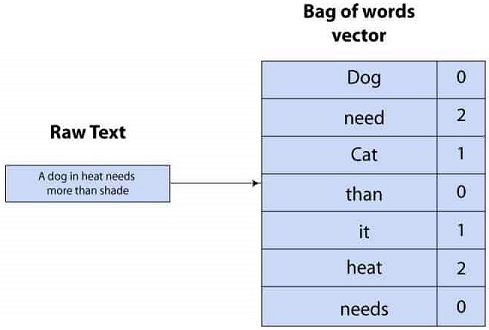

In [42]:
word_count = {}

for word in tokens1:
    
    if word not in word_count.keys():
        word_count[word] = 1
    else:
        word_count[word] += 1
        
print(f'Bag of Words: \n{tokens1} => {word_count}')

Bag of Words: 
['OVOFest', 'Drake', 'straight', 'body', 'bagging', 'Meek', 'on', 'that', 'OVO', 'stage'] => {'OVOFest': 1, 'Drake': 1, 'straight': 1, 'body': 1, 'bagging': 1, 'Meek': 1, 'on': 1, 'that': 1, 'OVO': 1, 'stage': 1}


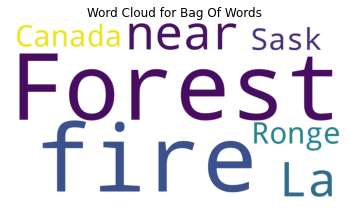

In [43]:
stopwords = set(STOPWORDS)

wc = WordCloud(width = 900, height = 500, background_color = 'white', random_state = 10).generate(text[1])

plt.title('Word Cloud for Bag Of Words')
plt.imshow(wc)
plt.axis('off')
plt.show()

# **Term Frequency**

TF – Term Frequency is described as the number of times that a term occurs in a document. It considers all the terms of equal importance. For example, the word “Fruit” appears five times in a document of 100 words, then the TF for “Fruit” is 5/100 = 0.05.

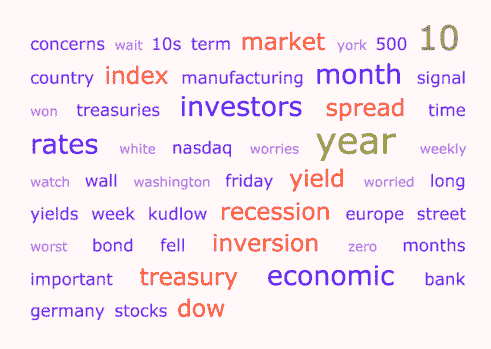

In [44]:
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [45]:
count_vectorizer = CountVectorizer()
text_list = list(text[0:10])

tf = count_vectorizer.fit_transform(text_list)

tf_feature_names = count_vectorizer.get_feature_names()

print('Term Frequency of Document')
df = pd.DataFrame(tf.toarray(), columns = tf_feature_names) / len(tf_feature_names)
df.style.set_caption("Term Frequency of Document")
df.style.applymap(color)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Term Frequency of Document


,000,13,20,across,afraid,alaska,all,allah,an,and,are,area,areas,as,asked,being,both,building,by,cafire,california,can,canada,causes,closed,colorado,coming,county,deeds,directions,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,from,got,happening,heavy,hill,hwy,in,into,is,just,la,lake,manitou,may,near,no,notified,now,of,officers,on,or,orders,other,our,people,photo,place,pours,rain,reason,receive,residents,rockyfire,ronge,ruby,sask,school,see,sent,shelter,smoke,springs,street,streets,that,the,there,this,to,top,tornado,update,us,wildfires,woods
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.010204,0.000000,0.010204,0.010204,0.010204,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.010204,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# **Term Frequency - Inverse Document Frequency**

TF-IDF – Term Frequency-Inverse Document Frequency is described as the importance of a word in a document, which is proportional to the number of times the word appears in the document. For example, the word “Fruit” appears in 100 of 10000 documents and the term frequency is 5 then the TF-IDF is 0.05 * log(10000/100) = 5 * 2 = 10.

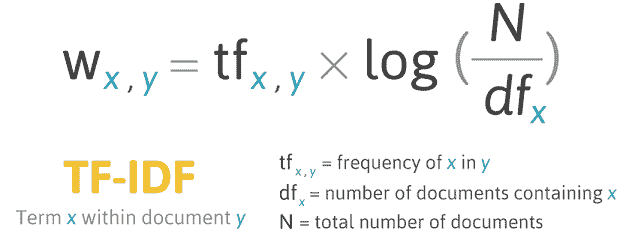

In [46]:
tfidf_vectorizer = TfidfVectorizer()
text_list = list(text[0:10])

tfidf = tfidf_vectorizer.fit_transform(text_list)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()

print('Term Frequency - Inverse Document Frequency of Document')
df = pd.DataFrame(tfidf.toarray(), columns = tfidf_feature_names)
df.style.set_caption("Term Frequency - Inverse Document Frequency of Document")
df.style.applymap(color)

Term Frequency - Inverse Document Frequency of Document


,000,13,20,across,afraid,alaska,all,allah,an,and,are,area,areas,as,asked,being,both,building,by,cafire,california,can,canada,causes,closed,colorado,coming,county,deeds,directions,disaster,due,earthquake,emergency,evacuation,expected,fire,flash,flood,flooding,forest,forgive,from,got,happening,heavy,hill,hwy,in,into,is,just,la,lake,manitou,may,near,no,notified,now,of,officers,on,or,orders,other,our,people,photo,place,pours,rain,reason,receive,residents,rockyfire,ronge,ruby,sask,school,see,sent,shelter,smoke,springs,street,streets,that,the,there,this,to,top,tornado,update,us,wildfires,woods
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257710,0.303156,0.000000,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.225466,0.000000,0.000000,0.000000,0.000000,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200455,0.000000,0.257710,0.000000,0.000000,0.000000,0.000000,0.303156,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290530,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390639,0.000000,0.390639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.171413,0.000000,0.000000,0.000000,0.342825,0.000000,0.000000,0.000000,0.201640,0.201640,0.000000,0.000000,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149966,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.216492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.201640,0.201640,0.000000,0.000000,0.201640,0.000000,0.201640,0.171413,0.201640,0.000000,0.000000,0.000000,0.403280,0.000000,0.000000,0.000000,0.000000,0.201640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.382366,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.205265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325046,0.000000,0.000000,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.382366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

# **Dependency Parser**

Stanford dependency parser establishes the relationship between entities in the language using grammatical rules. The output of the parser is a tree structure that is annotated. For example, in the sentence “The funny boy joked,” “funny” is an adjective for the noun “boy.”

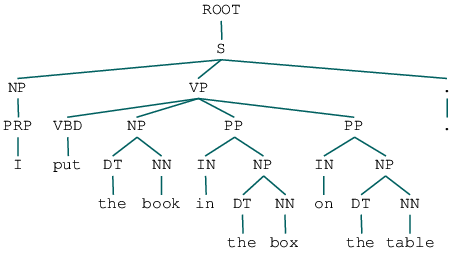

In [47]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

parser = nltk.RegexpParser(grammar)
parse_tree = parser.parse(tagged_tokens1)

print(f'Dependency Parse Tree using NLTK: \n\n{sents1[0]} => \n\n{parse_tree}')

Dependency Parse Tree using NLTK: 

#OVOFest Drake straight body bagging Meek on that OVO stage. => 

(S
  OVOFest/NNP
  Drake/NNP
  straight/VBD
  (NP body/NN)
  bagging/VBG
  Meek/NNP
  on/IN
  that/DT
  OVO/NNP
  (NP stage/NN))


In [48]:
print('Dependency Parse Tree using SpaCy')

displacy.render(sp(text[1000]), style = "dep", jupyter = True, options = {"distance" : 100})

Dependency Parse Tree using SpaCy


# **Named Entity Recognition**

NER - Named Entity Recognition is the process of extracting proper nouns or proper noun phrases. For example, in the sentence 'Robert is interested in Amazon', the entities 'Robert' (Name) and 'Amazon' (Organization) are selected.

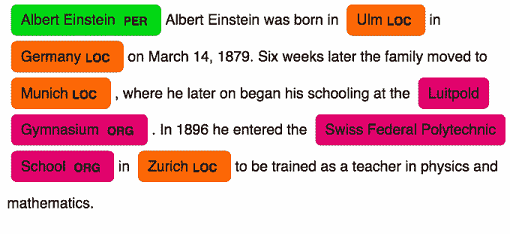

In [50]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Queen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.


True

In [52]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Queen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [53]:
ner_chunk = nltk.ne_chunk(tagged_tokens1)

print(f'Named Entity Recognition using NLTK: \n\n{sents1[0]} =>\n')

for x in str(ner_chunk).split('\n'):
    if '/NN' in x:
        print(x)

Named Entity Recognition using NLTK: 

#OVOFest Drake straight body bagging Meek on that OVO stage. =>

  (ORGANIZATION OVOFest/NNP)
  (PERSON Drake/NNP)
  body/NN
  (PERSON Meek/NNP)
  OVO/NNP
  stage/NN)


In [54]:
ner_sent = sp(text[1])

print(f'Named Entity Recognition using SpaCy: \n\n{ner_sent} =>\n')

for ent in ner_sent.ents:
    print(ent.text, '-', ent.label_)

Named Entity Recognition using SpaCy: 

Forest fire near La Ronge Sask. Canada =>

La Ronge Sask - FAC
Canada - GPE


In [55]:
print('Named Entity Recognition Visualization using SpaCy')
displacy.render(ner_sent, style = 'ent', jupyter = True)

Named Entity Recognition Visualization using SpaCy


# **Sentiment Analysis**

Sentimental analysis plays a significant role in determining the polarity of a review or a comment. It is used to know whether the person is talking about something in a positive way or a negative way. It can be classified broadly into positive, negative, and neutral. For example, on a tourism website, a person leaves a remark stating, “There are beautiful tourist spots in Switzerland. “The word ‘beautiful’ is positive as it describes Switzerland as pretty.

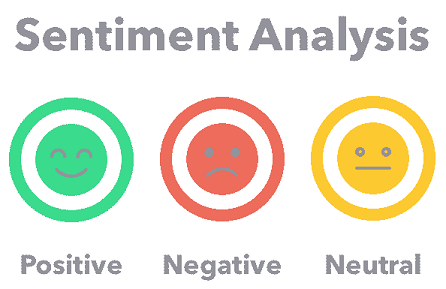

In [51]:
sia = SentimentIntensityAnalyzer()
polarity_scores1 = sia.polarity_scores(text[10])

print(f"Sentiment Analysis using NLTK: \n{text[10]} => {polarity_scores1}")

Sentiment Analysis using NLTK: 
Three people died from the heat wave so far => {'neg': 0.31, 'neu': 0.69, 'pos': 0.0, 'compound': -0.5574}


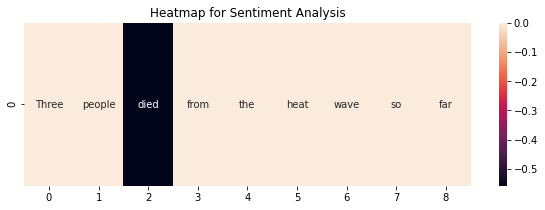

In [52]:
x = np.array([[sia.polarity_scores(word)['compound'] for word in word_tokenize(text[10])]])
annot = np.array([word_tokenize(text[10])])

plt.figure(figsize = (10, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Sentiment Analysis')
plt.show()

# **Subjectivity Detection**

Subjectivity Detection relies upon the answer to the question "Is it based on facts or opinions?". For example, the sentence 'I love cats' is subjective and the sentence 'Cats have tails' is objective.

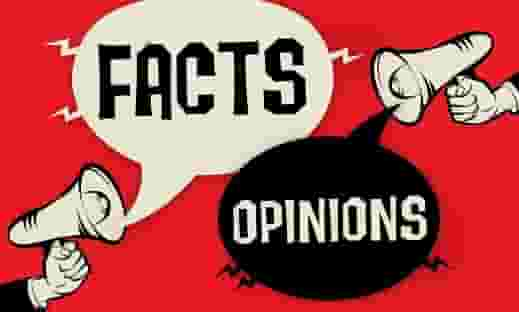

In [53]:
sp.add_pipe('spacytextblob')
senti_sent = sp(text[20])

print(f"SpaCy using TextBlob: \n\n{text[20]} =>\n")
print(f"Sentiment Analysis: {senti_sent._.polarity}")
print(f"Sentiment Subjectivity: {senti_sent._.subjectivity}")
print(f"Sentiment Assessment: {senti_sent._.assessments}")


SpaCy using TextBlob: 

this is ridiculous.... =>

Sentiment Analysis: -0.3333333333333333
Sentiment Subjectivity: 1.0
Sentiment Assessment: [(['ridiculous'], -0.3333333333333333, 1.0, None)]


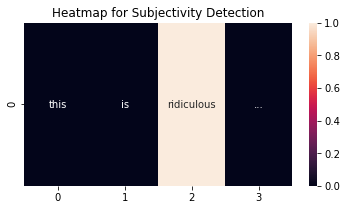

In [54]:
sub = sp(text[20])
x = np.array([[word._.subjectivity for word in sub]])
annot = np.array([word_tokenize(text[20])[ : -1]])

plt.figure(figsize = (6, 3))
sns.heatmap(x, annot = annot, fmt = '')
plt.title('Heatmap for Subjectivity Detection')
plt.show()